In [1]:
!pip install tensorwatch

     |████████████████████████████████| 194kB 6.5MB/s 
     |████████████████████████████████| 143kB 14.7MB/s 
  Created wheel for tensorwatch: filename=tensorwatch-0.9.1-cp36-none-any.whl size=214531 sha256=48418c4b1c6ab572afd7699f790a4b9b5b0d524d24254f7692b1420b84c8d136
  Stored in directory: /root/.cache/pip/wheels/d7/bd/66/2c47000818e3ea8623985f59e47c2d661eace3f2969119339c
  Created wheel for pydotz: filename=pydotz-1.5.1-py2.py3-none-any.whl size=20171 sha256=bb7e3978d39f7b2c6c998dd316976706bbc357a90133d2062ff4c5b17da5d059
  Stored in directory: /root/.cache/pip/wheels/09/38/83/2f148899f3e73f67e9fc4a98ebf8bff8c4d0da8ca30671cc61
Successfully built tensorwatch pydotz


saliency is a very powerfull visual attribute method for model representation we are going to take advantage of this library of tensorwatch for this note book.

Let us import saliency

In [0]:
from tensorwatch.saliency import saliency

Also let us import the rest of the required stuff

In [0]:
from tensorwatch import image_utils, imagenet_utils, pytorch_utils

For this notebook we shall be playing around with ResNet 50,
ResNet which is the abrivation of Residual Networks is mostly used for Computer Vision taks. It is the winner of the Google's Image Net challenge. The advantage of ResNet is that it resolves the vanising gradient problem. ResNet uses skip connections to avoid vanising gradient problem while training very deep neural networks. They allow shorter path to flow for the graident. 


In [4]:
model = pytorch_utils.get_model("resnet50")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


Here I am going to use the dog image which i found in the tensor watch tutorial itself
![alt text](https://raw.githubusercontent.com/microsoft/tensorwatch/master/data/test_images/dogs.png)

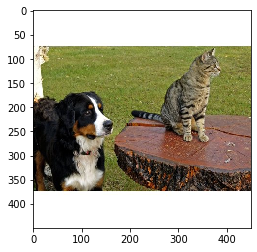

In [6]:
img = image_utils.open_image("dogs.png",convert_mode="RGB")
image_utils.show_image(img)

Let us feed this image into ImageNet and see what output we get



In [0]:
probabiliteis = imagenet_utils.predict(model=model,images=[img])

The output of ImageNet would be the probability of 1000 classes in the imagenet this would be hard for us to understand so let us convert this into something which we could actually use now to consume and get only the top 5 output as a tuple

In [11]:
imagenet_utils.probabilities2classes(probabiliteis, topk=5)

((0.4730125, 239, 'Bernese_mountain_dog', 'n02107683'),
 (0.18005037, 240, 'Appenzeller', 'n02107908'),
 (0.08727147, 281, 'tabby', 'n02123045'),
 (0.05599629, 241, 'EntleBucher', 'n02108000'),
 (0.05060716, 282, 'tiger_cat', 'n02123159'))

Here even though we have both a cat and a dog in out image the index 239 which is actually a dog has been predicted by our model.
Now Let us figue out how out model is doing this prediction.

In [0]:
input_tensor = imagenet_utils.image2batch(img)
prediction_tensor = pytorch_utils.int2tensor(239)

With the above cell we would get around 6 different mentods by which the nerual network is predicting the output. We can try to visualise this now.

In [0]:
results = saliency.get_image_saliency_results(model,img,input_tensor,prediction_tensor)

The variable results now has an ImageSaliencyResult object array, we can visualise this object by using tensorwatches menthods.

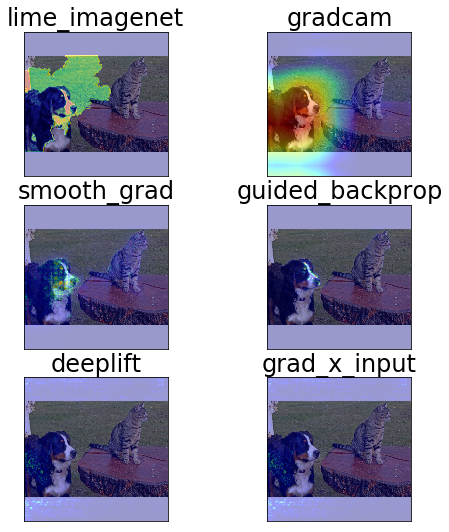

In [14]:
figure = saliency.get_image_saliency_plot(results)

Awesome now we know how out netual netork is thinking.